# Data preprocessing - continued

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataframe_checks import check_time_column, check_col_types, check_missing_values, data_report, plot_time_series

In [25]:
Miguel_path = "C:/Users/User/Desktop/Project_repos/timecave";
raw_path = "timecave/experiments/datasets/raw";

In [26]:
path = f"{Miguel_path}/{raw_path}";

## NY Taxi dataset

In [13]:
taxi_data = pd.read_csv(f"{path}/NYC Taxi Traffic/dataset.csv", index_col=[0], parse_dates=["timestamp"]);

In [14]:
taxi_data

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [15]:
data_report(taxi_data, "timestamp", "30min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [17]:
taxi_data.dtypes

timestamp    datetime64[ns]
value                 int64
dtype: object

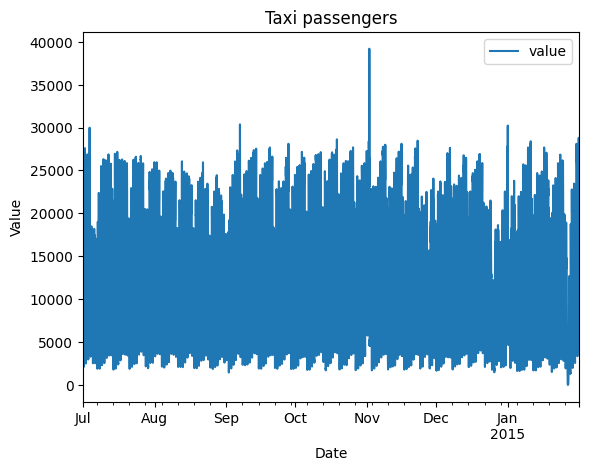

In [21]:
plot_time_series(taxi_data, title="Taxi passengers");

In [23]:
taxi_data.shape

(10320, 2)

In [24]:
taxi_data.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/taxi_data.csv", index=False);

## Electric Power Consumption

In [30]:
power_consumption_data = pd.read_csv(f"{path}/Electric Power Consumption/powerconsumption.csv", parse_dates=["Datetime"]);

In [31]:
power_consumption_data

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [33]:
data_report(power_consumption_data, "Datetime", freq="10min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [34]:
power_consumption_data.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/power_consumption_data.csv", index=False);

## Room Occupancy Detection

In [35]:
room_occupancy_detection = pd.read_csv(f"{path}/Room Occupancy Detection/Occupancy.csv", parse_dates=["date"]);

In [38]:
data_report(room_occupancy_detection, "date", "min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 2181
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [43]:
room_occupancy_detection["date"] = room_occupancy_detection["date"].dt.round("min");

In [44]:
data_report(room_occupancy_detection, "date", "min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 2181
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [49]:
room_occupancy_detection = check_time_column(room_occupancy_detection, "date", "min", fix=True);

3. Number of missing timesteps: 2181
4. Number of duplicated timesteps: 0


In [51]:
data_report(room_occupancy_detection, "date", "min")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column 'Temperature' : 2181
Number of missing values in column 'Humidity' : 2181
Number of missing values in column 'Light' : 2181
Number of missing values in column 'CO2' : 2181
Number of missing values in column 'HumidityRatio' : 2181
Number of missing values in column 'Occupancy' : 2181
5. Number of Time Series with missing values : 6
________________________________________________________________


In [54]:
room_occupancy_detection = check_missing_values(room_occupancy_detection, alpha=0.1, fix=True);

Number of missing values in column 'Temperature' : 2181
Number of missing values in column 'Humidity' : 2181
Number of missing values in column 'Light' : 2181
Number of missing values in column 'CO2' : 2181
Number of missing values in column 'HumidityRatio' : 2181
Number of missing values in column 'Occupancy' : 2181
5. Number of Time Series with missing values : 6


In [55]:
data_report(room_occupancy_detection, "date", "min")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


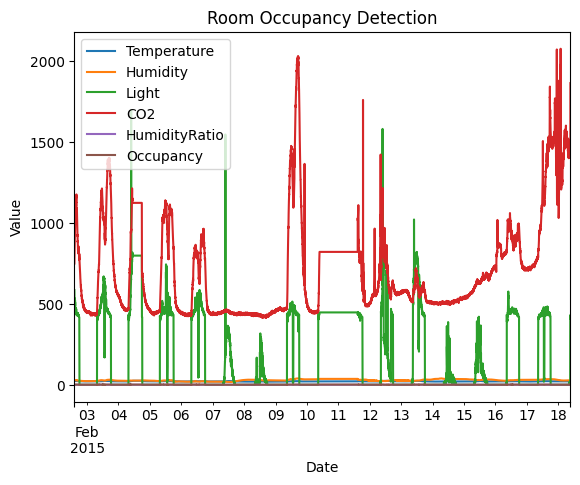

In [56]:
plot_time_series(room_occupancy_detection, legend=True, title="Room Occupancy Detection");

In [57]:
room_occupancy_detection.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/room_occupancy_data.csv", index=False);

## 